# Contributors

Ooi Li Yoong (1211306826)

Heng Peng Yong (1211306514)

Pang Shi An (1221303733)

Teoh Chee Hong (1221303824)

# Data Source

https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
survey_df = pd.read_csv("Starbucks satisfactory survey.csv")

# Understanding Data & Data Cleaning

In [3]:
survey_df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


-> Timestamp seems to be the index key.

In [4]:
survey_df['Timestamp'].min()

'2019/10/01 12:38:43 PM GMT+8'

-> The data is up to year 2019 and later.

In [5]:
# Check data duplication
survey_df.duplicated().sum()

0

-> There are no duplicated rows. Since duplication has been checked, the index key is no longer useful and can be removed.

In [6]:
# Drop index key
survey_df.drop(columns=['Timestamp'], inplace = True)

In [7]:
# Check data completeness
(survey_df.isnull().mean()*100).round(3)

1. Your Gender                                                                                                            0.00
2. Your Age                                                                                                               0.00
3. Are you currently....?                                                                                                 0.00
4. What is your annual income?                                                                                            0.00
5. How often do you visit Starbucks?                                                                                      0.00
6. How do you usually enjoy Starbucks?                                                                                    0.82
7. How much time do you normally  spend during your visit?                                                                0.00
8. The nearest Starbucks's outlet to you is...?                                                                

-> The percentage of missing data is low. Hence, we simply remove missing data as it will not cause significant information loss.

In [8]:
survey_df.dropna(inplace=True)
survey_df.reset_index(inplace=True, drop=True)

In [9]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   1. Your Gender                                                                                                          121 non-null    object
 1   2. Your Age                                                                                                             121 non-null    object
 2   3. Are you currently....?                                                                                               121 non-null    object
 3   4. What is your annual income?                                                                                          121 non-null    object
 4   5.

-> There are both categorical and numerical data. Categorical data has to be encoded because some classifiers only accept numerical inputs. Moreover, the column names and column values are quite long, thus, it is a good idea to rename them or convert them into a more convenient and feasible format.

In [10]:
new_column_names = ['Gender','Age','Occupation','AnnualIncome','VisitFrequency','OrderType','TimeSpent','OutletLocation','Membership','PurchaseFrequently','AverageSpending','ProductRating','PriceRating','PromotionRating','AmbianceRating','WiFiRating','ServiceRating','HangoutPlaceRating','PromotionTools','Loyal_Customer']
survey_df.columns = new_column_names
survey_df.columns

Index(['Gender', 'Age', 'Occupation', 'AnnualIncome', 'VisitFrequency',
       'OrderType', 'TimeSpent', 'OutletLocation', 'Membership',
       'PurchaseFrequently', 'AverageSpending', 'ProductRating', 'PriceRating',
       'PromotionRating', 'AmbianceRating', 'WiFiRating', 'ServiceRating',
       'HangoutPlaceRating', 'PromotionTools', 'Loyal_Customer'],
      dtype='object')

-> Column names are now more concise.

## OrderType

In [11]:
survey_df['OrderType'].value_counts()

OrderType
Take away             49
Dine in               46
Drive-thru            20
never                  2
Never buy              1
I dont like coffee     1
Never                  1
Never                  1
Name: count, dtype: int64

In [12]:
survey_df['OrderType'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never ',], 'Never buy', inplace = True)
survey_df['OrderType'].value_counts()

OrderType
Take away     49
Dine in       46
Drive-thru    20
Never buy      6
Name: count, dtype: int64

## PurchaseFrequently

In [13]:
survey_df['PurchaseFrequently'].value_counts()

PurchaseFrequently
Coffee                                           65
Cold drinks                                      25
Coffee;Pastries                                   6
Coffee;Cold drinks                                6
Coffee;Sandwiches                                 3
Pastries                                          2
Cold drinks;Juices;Pastries                       2
Coffee;Pastries;Sandwiches                        1
Coffee;Juices;Pastries;Sandwiches                 1
Cold drinks;Pastries                              1
Coffee;Cold drinks;Pastries;Sandwiches            1
Never                                             1
Jaws chip                                         1
cake                                              1
Cold drinks;Pastries;Sandwiches                   1
Cold drinks;Never                                 1
never                                             1
Nothing                                           1
Coffee;Cold drinks;Juices;Pastries;Sandwiches

In [14]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
purchase = cvr.fit_transform(survey_df['PurchaseFrequently'])

print(cvr.get_feature_names_out())

['cake ' 'coffee' 'cold drinks' 'jaws chip ' 'juices' 'never' 'nothing '
 'pastries' 'sandwiches']


In [15]:
purchase_value = pd.DataFrame(purchase.toarray(), columns = cvr.get_feature_names_out())
purchase_value['NeverBuy']= purchase_value.iloc[:, -6:-3].sum(axis=1)

purchase_value.drop(columns=['never', 'nothing '], inplace = True)

purchase_value.rename({'cake ' : 'BuyCake', 'coffee' : 'BuyCoffee', 'cold drinks' : 'BuyColdDrinks', 'jaws chip ' : 'BuyJawsChip', 'juices' : 'BuyJuices', 'pastries' : 'BuyPastries', 'sandwiches' : 'BuySandwiches'}, inplace = True , axis = 1)

survey_df = pd.concat([survey_df, purchase_value], axis = 1)
survey_df

,Gender,Age,Occupation,AnnualIncome,VisitFrequency,OrderType,TimeSpent,OutletLocation,Membership,PurchaseFrequently,...,PromotionTools,Loyal_Customer,BuyCake,BuyCoffee,BuyColdDrinks,BuyJawsChip,BuyJuices,BuyPastries,BuySandwiches,NeverBuy
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,0,0,0,0,0,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,Social Media;In Store displays,Yes,0,0,1,0,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,In Store displays;Billboards,Yes,0,1,0,0,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,Through friends and word of mouth,No,0,1,0,0,0,0,0,0
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,0,0,0,0
117,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,1,0,1,1,1,1
118,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,Social Media;Through friends and word of mouth...,No,0,1,1,0,0,0,0,0
119,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,Social Media;Through friends and word of mouth...,Yes,0,1,0,0,0,0,0,0


## PromotionTools

In [16]:
survey_df['PromotionTools'].value_counts()

PromotionTools
Social Media                                                                                                                                   31
Social Media;Through friends and word of mouth                                                                                                 14
Through friends and word of mouth                                                                                                               9
Starbucks Website/Apps;Social Media                                                                                                             9
In Store displays                                                                                                                               7
Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth                                                                    6
Starbucks Website/Apps;Social Media;Through friends and word of mouth                                        

In [17]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
promo = cvr.fit_transform(survey_df['PromotionTools'])

print(cvr.get_feature_names_out())

['application offer' 'billboards' 'deal sites (fave, iprice, etc...)'
 'emails' 'in store displays' 'never hear' 'social media'
 'starbucks website/apps' 'through friends and word of mouth']


In [18]:
promo_value = pd.DataFrame(promo.toarray(), columns = cvr.get_feature_names_out())

promo_value.rename({'application offer' : 'PromoAppsOffer', 'billboards' : 'PromoBillboards', 'deal sites (fave, iprice, etc...)' : 'PromoSites', 'emails' : 'PromoEmails', 'in store displays' : 'PromoStoreDisplay', 'never hear' : 'NeverHeard', 'social media' : 'PromoSocMed', 'starbucks website/apps' : 'PromoSBucksApps', 'through friends and word of mouth' : 'PromoWoM'} , inplace = True , axis = 1)

survey_df = pd.concat([survey_df, promo_value], axis = 1)
survey_df

,Gender,Age,Occupation,AnnualIncome,VisitFrequency,OrderType,TimeSpent,OutletLocation,Membership,PurchaseFrequently,...,NeverBuy,PromoAppsOffer,PromoBillboards,PromoSites,PromoEmails,PromoStoreDisplay,NeverHeard,PromoSocMed,PromoSBucksApps,PromoWoM
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,0,0,0,1,1,0,0,1,1,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,0,0,0,0,0,1,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,0,0,1,0,0,1,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,0,0,0,0,0,0,0,0,0,1
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,0,0,0,0,0,0,0,1,1,0
117,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,1,0,1,1,1,1,0,1,1,1
118,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,0,0,0,0,0,1,0,1,0,1
119,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,0,0,1,0,0,0,0,1,0,1


## Drop Column

In [19]:
survey_df.drop(columns=['PurchaseFrequently', 'PromotionTools'], inplace = True)

In [20]:
survey_df.columns

Index(['Gender', 'Age', 'Occupation', 'AnnualIncome', 'VisitFrequency',
       'OrderType', 'TimeSpent', 'OutletLocation', 'Membership',
       'AverageSpending', 'ProductRating', 'PriceRating', 'PromotionRating',
       'AmbianceRating', 'WiFiRating', 'ServiceRating', 'HangoutPlaceRating',
       'Loyal_Customer', 'BuyCake', 'BuyCoffee', 'BuyColdDrinks',
       'BuyJawsChip', 'BuyJuices', 'BuyPastries', 'BuySandwiches', 'NeverBuy',
       'PromoAppsOffer', 'PromoBillboards', 'PromoSites', 'PromoEmails',
       'PromoStoreDisplay', 'NeverHeard', 'PromoSocMed', 'PromoSBucksApps',
       'PromoWoM'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Univariate Analysis (Categorical)

In [21]:
survey_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductRating,121.0,3.685950,0.913173,1.0,3.0,4.0,4.0,5.0
PriceRating,121.0,2.909091,1.072381,1.0,2.0,3.0,4.0,5.0
PromotionRating,121.0,3.818182,1.064581,1.0,3.0,4.0,5.0,5.0
AmbianceRating,121.0,3.760331,0.931171,1.0,3.0,4.0,4.0,5.0
WiFiRating,121.0,3.256198,0.962020,1.0,3.0,3.0,4.0,5.0
ServiceRating,121.0,3.752066,0.829468,1.0,3.0,4.0,4.0,5.0
HangoutPlaceRating,121.0,3.520661,1.033595,1.0,3.0,4.0,4.0,5.0
BuyCake,121.0,0.008264,0.090909,0.0,0.0,0.0,0.0,1.0
BuyCoffee,121.0,0.694215,0.462655,0.0,0.0,1.0,1.0,1.0
BuyColdDrinks,121.0,0.314050,0.466066,0.0,0.0,0.0,1.0,1.0


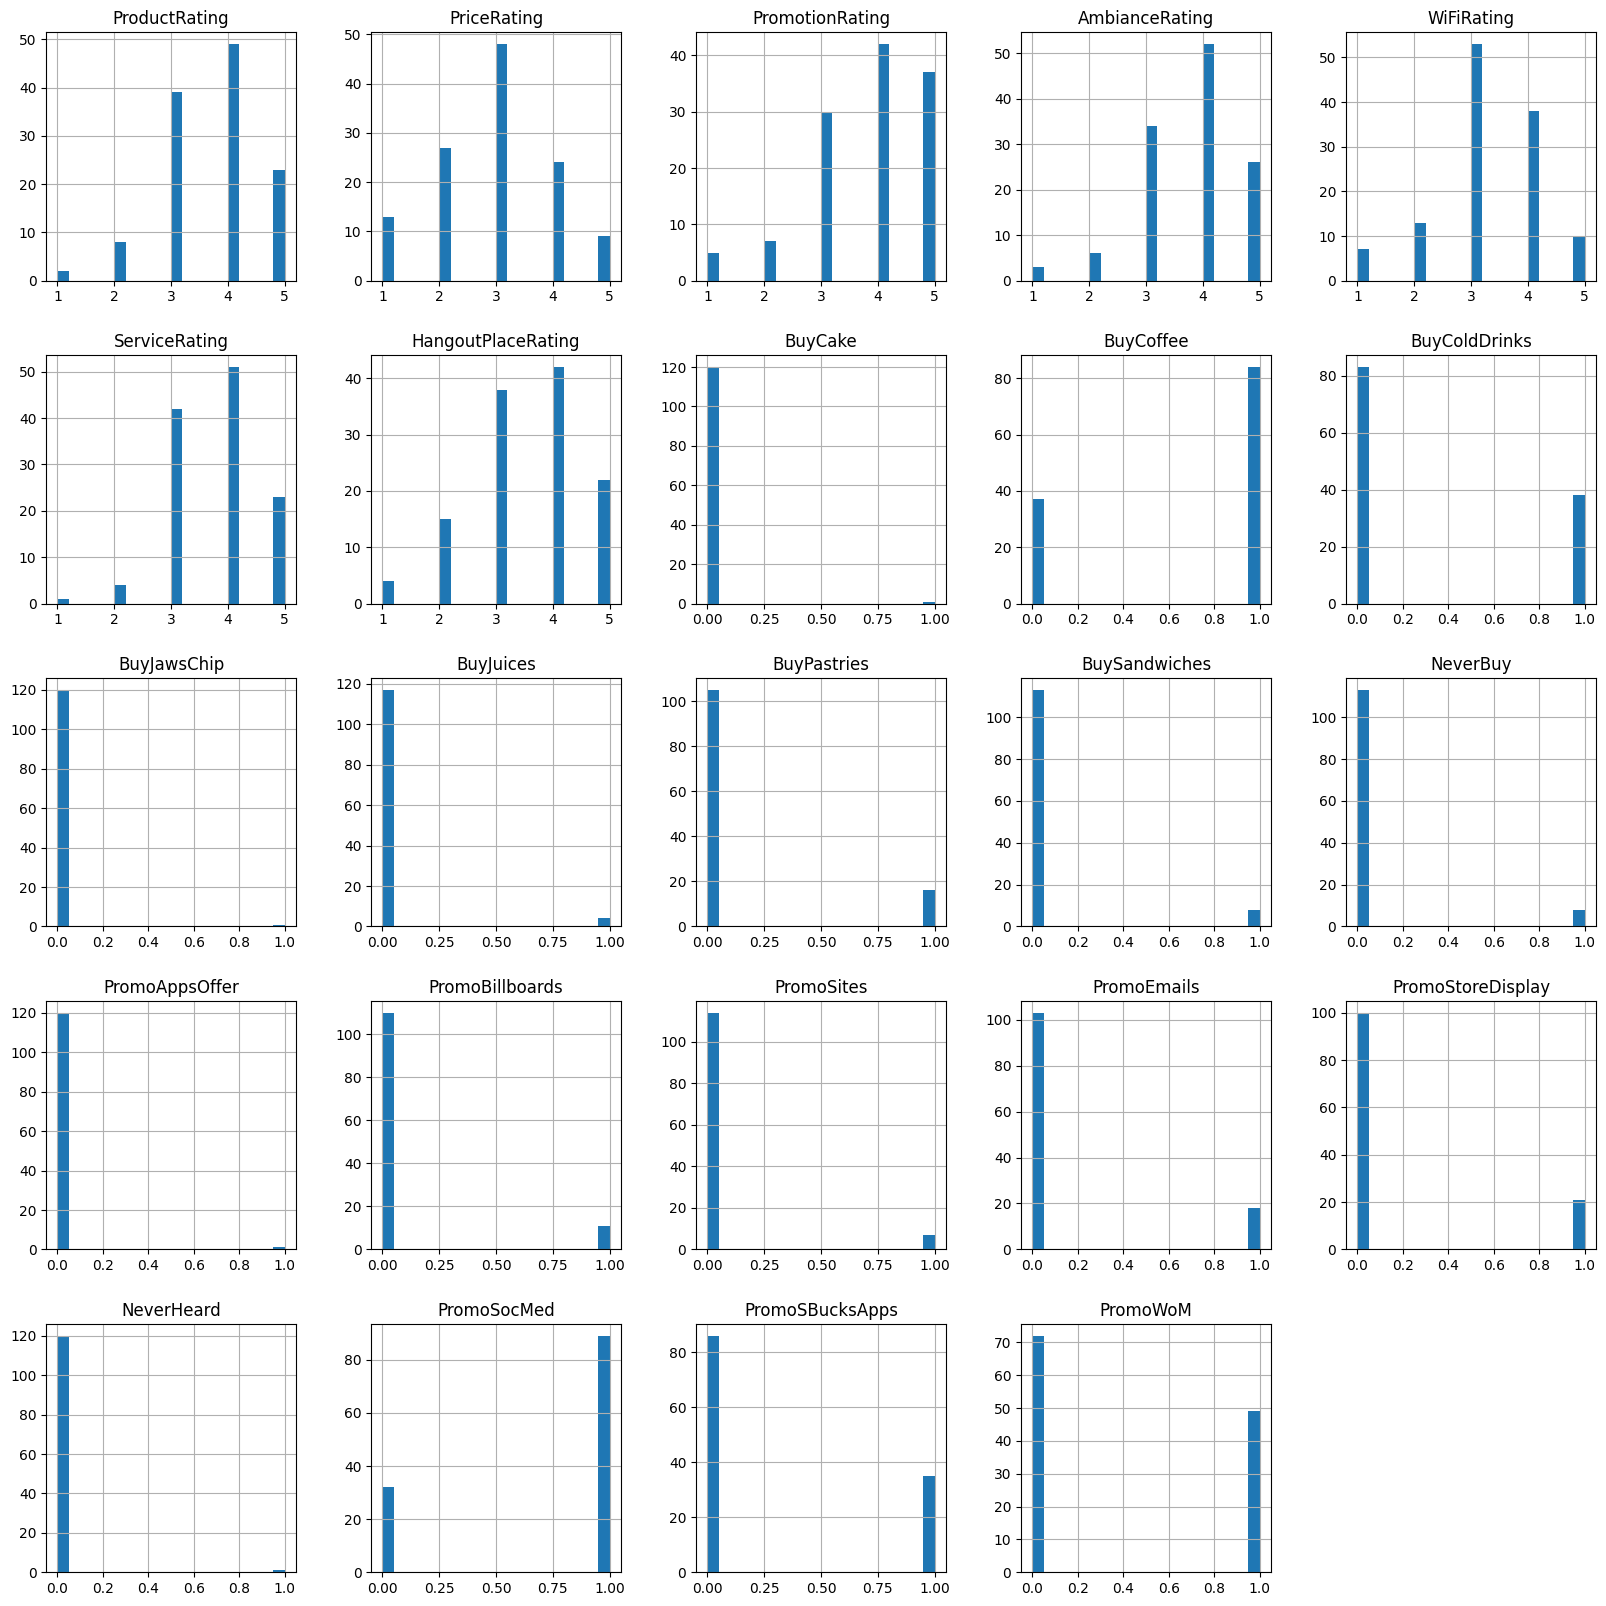

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
survey_df.hist(bins=20,figsize=(20,20))
plt.show()

### Bivariate (Numerical-Numerical) [Correlation Heatmap]

<AxesSubplot: >

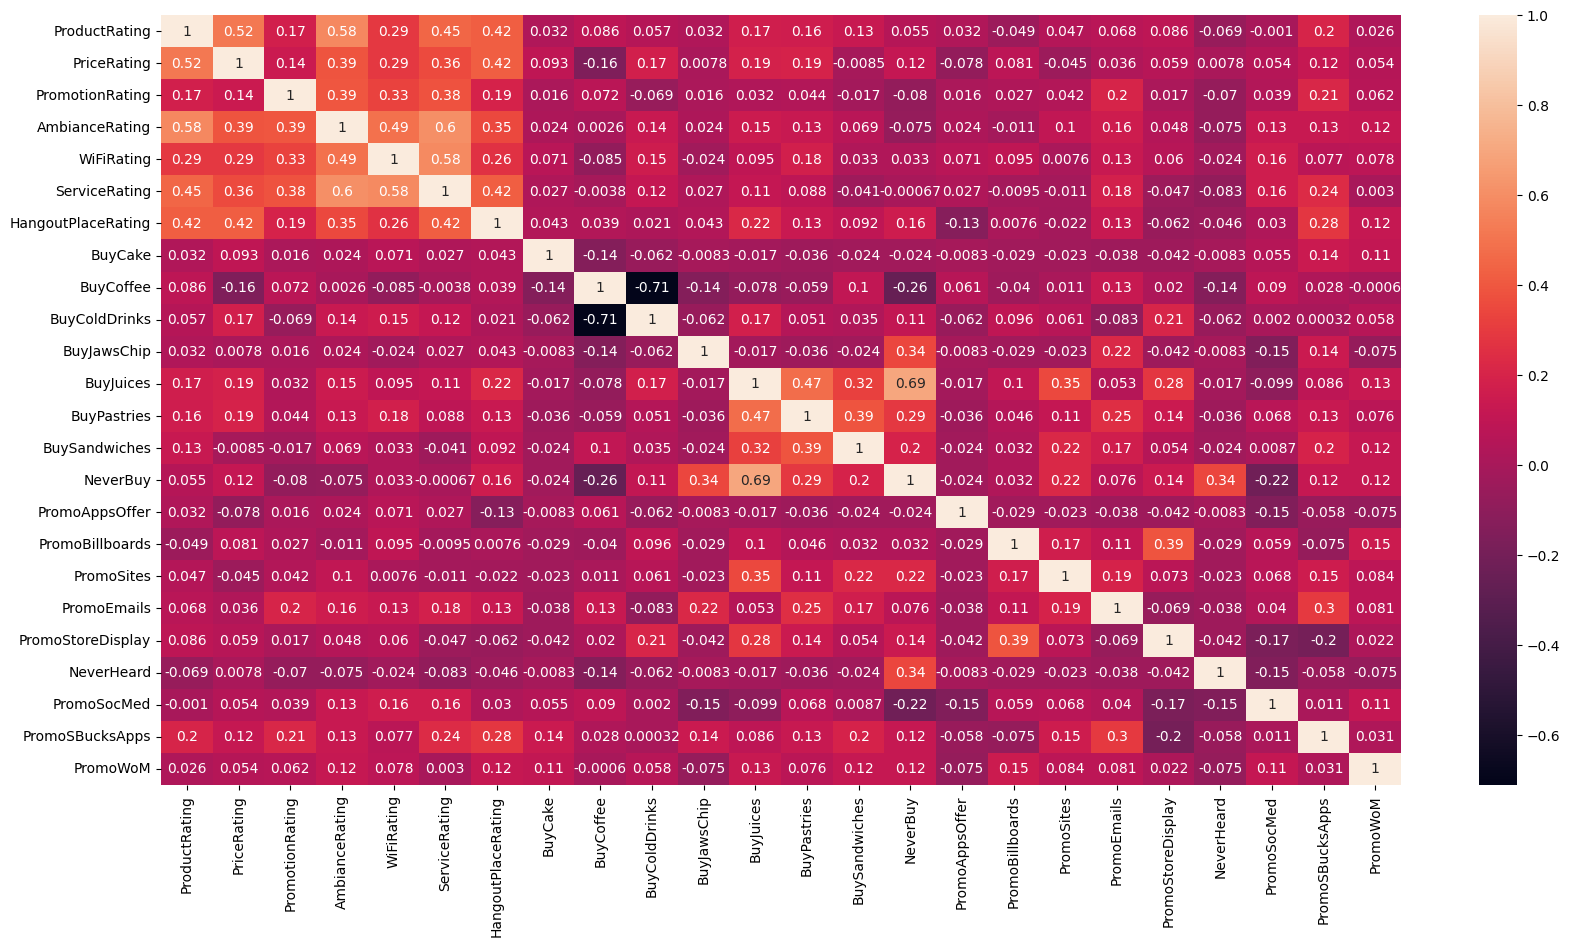

In [23]:
plt.figure(figsize = (20,10))

sns.heatmap(survey_df.corr(numeric_only=True), annot =True)

## Class Distribution of Target Variable

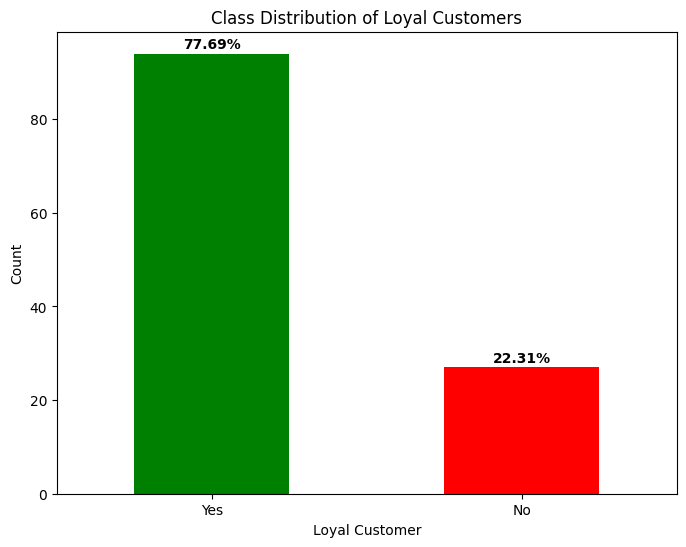

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Loyal_Customer' is a column in your DataFrame df
class_distribution = survey_df['Loyal_Customer'].value_counts()

# Calculate percentages
total = class_distribution.sum()
percentages = (class_distribution / total) * 100

# Plotting the class distribution
plt.figure(figsize=(8, 6))
bars = class_distribution.plot(kind='bar', color=['green', 'red'])  # Adjust colors as needed

# Adding percentages to the bars
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentages.iloc[i]:.2f}%', 
             ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Class Distribution of Loyal Customers')
plt.xlabel('Loyal Customer')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure labels are readable
plt.show()


-> Class imbalance problem occurs

In [25]:
# Save survey_df to a new CSV file
survey_df.to_csv('cleaned_data.csv', index=False)

# Model Construction & Evaluation

In [26]:
df = pd.read_csv('cleaned_data.csv')
df.head()

X = df.drop('Loyal_Customer', axis=1)  # Independent variables
y = df['Loyal_Customer']  # Target variable

# General Preprocessing:

# One-hot encoding (OHE) for X
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int', 'float']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)
X_transformed = preprocessor.fit_transform(X)
transformed_feature_names = preprocessor.get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_feature_names)

# Label Encoding for y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Train-test split with a training size of 0.8 and testing size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_encoded, test_size=0.2, random_state=42)

## M1 (Logistic Regression)

In [27]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.500     0.333     0.400         6
           1      0.810     0.895     0.850        19

    accuracy                          0.760        25
   macro avg      0.655     0.614     0.625        25
weighted avg      0.735     0.760     0.742        25



## M2 (PCA + Logistic Regression)

In [28]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_transformed_df)
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train_PCA, y_train)
y_pred_test = model.predict(X_test_PCA)
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

          No      0.500     0.333     0.400         6
         Yes      0.810     0.895     0.850        19

    accuracy                          0.760        25
   macro avg      0.655     0.614     0.625        25
weighted avg      0.735     0.760     0.742        25



## M3 (PCA + SMOTE + Logistic Regression)

In [29]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_transformed_df)
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.9, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_PCA, y_train)
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred_test = model.predict(X_test_PCA)
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

          No      0.444     0.667     0.533         6
         Yes      0.875     0.737     0.800        19

    accuracy                          0.720        25
   macro avg      0.660     0.702     0.667        25
weighted avg      0.772     0.720     0.736        25



## M4 (Random Forest)

In [30]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

          No      0.333     0.167     0.222         6
         Yes      0.773     0.895     0.829        19

    accuracy                          0.720        25
   macro avg      0.553     0.531     0.526        25
weighted avg      0.667     0.720     0.684        25



## M5 (PCA + Random Forest)

In [31]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_transformed_df)
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_PCA, y_train)
y_pred_test = model.predict(X_test_PCA)
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

          No      0.000     0.000     0.000         6
         Yes      0.750     0.947     0.837        19

    accuracy                          0.720        25
   macro avg      0.375     0.474     0.419        25
weighted avg      0.570     0.720     0.636        25



## M6 (PCA + SMOTE + Random Forest)

In [32]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_transformed_df)
X_train_PCA, X_test_PCA, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.9, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_PCA, y_train)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred_test = model.predict(X_test_PCA)
print(classification_report(y_test, y_pred_test, digits=3))

              precision    recall  f1-score   support

          No      0.333     0.167     0.222         6
         Yes      0.773     0.895     0.829        19

    accuracy                          0.720        25
   macro avg      0.553     0.531     0.526        25
weighted avg      0.667     0.720     0.684        25



# Reference

https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey

https://www.kaggle.com/code/aditiani/starbucks-customers-accuracy#Data-Cleaning

https://medium.com/towards-data-science/machine-learning-step-by-step-6fbde95c455a